In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
import pandas as pd
import csv
import cv2
import glob
import re
import torchvision.transforms.functional as TF
from PIL import Image

In [16]:
#lab 06 laptop needs this. lab 04 doesn't 
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [17]:
lab06root = "CSCI9015/FacialExpressionGenerator/Output/landmark"

In [ ]:
lab06cvroot="../Program Files/"

In [18]:
lab06outPos = 'PosImgs'

In [19]:
imglist =sorted(glob.glob(lab06root+'/*.png'),
                      key=lambda x:float(re.findall("(\d+)",x)[0])) 

In [3]:
root="../Output/landmark"
imglist =sorted(glob.glob(root+'/*.png'),
                      key=lambda x:float(re.findall("(\d+)",x)[0])) 

In [55]:
indices = np.random.choice(5000, 310,replace=False)

In [56]:
test = indices[-10:]

In [57]:
test

array([3339, 1084, 1921,  644,  578, 1679,  858, 1087, 2278, 1807])

In [58]:
trainlist = indices[:300]

In [59]:
len(trainlist)

300

In [60]:
trainlist

array([3506, 4351,  767, 1317, 4855, 1286, 4831, 1986, 3201, 2321,  203,
       2924, 2330, 4140, 2382, 2205,  711, 3259, 1591,  140, 1884, 4238,
       4323, 4361, 3018, 3694, 3930, 1662,  379, 3904, 1299,  916, 1693,
       2638, 1414,  494, 1696, 3756, 3477,  972, 2224, 4599, 1434, 4318,
       2991, 1706, 3326, 4518, 1076, 4666, 4162,  785,  937, 3238, 1814,
       1410, 1329,  318, 3454, 2544, 3629, 2849, 3150, 2066, 4517, 4819,
       3557, 3310, 4725, 2897, 3619, 4928, 1390, 1000, 3937, 1579, 4349,
       2791, 4287, 3640, 3711, 3857, 2766, 3065, 3649, 2084, 3416, 4596,
       2787,  705, 1531, 3295,  138, 1112, 1899, 1487, 3831, 3641, 2252,
        821, 4195, 3753, 4262, 1050, 4811,  360, 2179, 1031, 2961, 1485,
       4534,  826, 2434, 1863, 3897, 1708, 3232,  239, 1355, 3265, 4384,
       4888, 3492, 4267, 3863,  324, 1348, 1346,  569, 4636, 4815, 3561,
       1455, 2315, 2065, 2944, 1695, 2183, 3138, 3194, 3701, 3498, 3699,
       3674, 2468, 1720, 3634,  271, 2359, 2466, 23

In [29]:
type(imglist)

list

In [61]:
imgetrain = []
for indexes in trainlist:
    imgetrain.append(imglist[indexes])

In [62]:
len(imgetrain)

300

In [63]:
imgetrain

['CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapRight2FemaleAdultblendShape1.AU_16_LowerLipDepressor_50.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapRight5MaleAdultblendShape1.SR_11_Mouth_Upper_Overturn_75.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapLeft2FemaleAdultblendShape1.AA_VI_01_PP_25.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapLeft4MaleAdultblendShape1.AU_14_Dimpler_75.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapRight8MaleAdultblendShape1.AA_VI_05_KK_75.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapLeft4MaleAdultblendShape1.AA_VI_13_O_100.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapRight7MaleAdultblendShape1.SR_Tongue_LongStep1_75.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapLeft7MaleAdultblendShape1.AA_VI_11_E_100.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapRight1Female

In [14]:
cascade

NameError: name 'cascade' is not defined

In [33]:
from matplotlib.patches import Rectangle

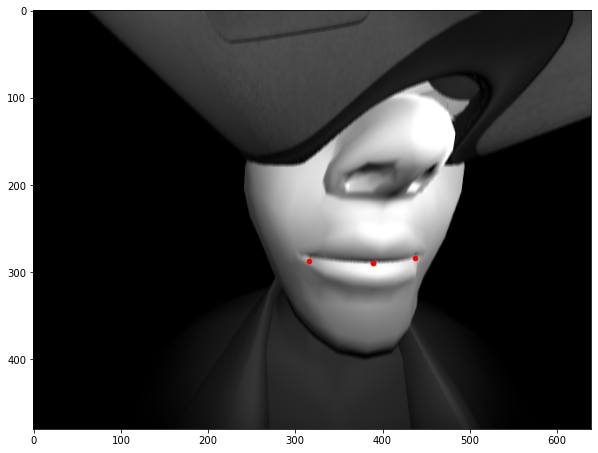

In [33]:
filename = imgetrain[0]
if 'Left' in filename:
    left = True 
img = Image.open(filename)
blur = TF.gaussian_blur(img,(3,5),(0.1,6))
#CLASStorchvision.transforms.GaussianBlur(kernel_size, sigma=(0.1, 2.0))
csvfile = filename.replace("png","csv")
df = pd.read_csv(csvfile, 
                 sep=',', header=None)
yeah = df.to_numpy()
plt.figure(figsize=(10,10))
plt.imshow(blur)
plt.scatter(yeah[:,0],yeah[:,1], s = 20, c = 'r')
plt.show()
#plt.gca().add_patch(Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none'))


In [25]:
img.load()[306,408] #PIL pixel access

(7, 7, 7, 255)

In [ ]:
for filename in imgetrain:
    img = Image.open(filename)
    blur = TF.gaussian_blur(img,(5,9),(9,11))
    csvfile = filename.replace("png","csv")
    df = pd.read_csv(csvfile, 
                     sep=',', header=None)
    yeah = df.to_numpy()
    

In [34]:
def lowerFaceCut(photoName, CutWeight = 240,CutHeight = 260):
    # give a default cut of lower face interest of area
    # square
    img = Image.open(photoName)
        #blur = TF.gaussian_blur(img,(3,5),(0.1,6))
    csvfile = photoName.replace("png","csv")
    #print(csvfile)
    df = pd.read_csv(csvfile, 
                 sep=',', header=None)
    lipmarks = df.to_numpy()
    lefttop = np.amin(lipmarks,axis = 0).astype("int") 
    #print(lipmarks)
    #print(lefttop)
    #default will be tuned later
    leftoffset = (60,150)
    rightoffset = (70,150)
    if 'Left' in photoName:
        #print('left ', lefttop[0] - leftoffset[0] , ' ' , lefttop[1] -leftoffset[1])
        return (lefttop[0] - leftoffset[0],lefttop[1] -leftoffset[1],
                lefttop[0] - leftoffset[0] + CutWeight, lefttop[1] - leftoffset[1]+CutHeight)
         
    else:
        #print('right' , lefttop[0] - rightoffset[0] , ' ' , lefttop[1]-rightoffset[1])
        return (lefttop[0] - rightoffset[0],lefttop[1]-rightoffset[1],
                lefttop[0]-rightoffset[0]+CutWeight,lefttop[1]-rightoffset[1]+CutHeight)

In [31]:
filename0 = imgetrain[0]

In [32]:
filename0

'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapLeft10MaleAdultblendShape1.HB_04_R_MouthBite_25.png'

In [72]:
cut0 = lowerFaceCut(filename0,CutHeight = 240)

In [76]:
cut0[2]-cut0[0] , cut0[3] - cut0[1]

(240, 240)

In [73]:
f1 = imgetrain[1]

In [182]:
f1

'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapRight0FemaleAdultblendShape1.AA_VI_13_O_25.png'

In [183]:
cut1 = lowerFaceCut(f1)

CSCI9015/FacialExpressionGenerator/Output/landmark\_v0__leapRight0FemaleAdultblendShape1.AA_VI_13_O_25.csv
[[249.8483 285.058 ]
 [203.2786 279.1057]
 [251.2203 292.8449]
 [320.888  277.5164]]
[203 277]
right 133   127


In [184]:
cut0

(255, 133, 495, 393)

In [185]:
str(cut0[0])

'255'

In [188]:
def blurandshow(fname, cuts):
    img = Image.open(fname)
    blur = TF.gaussian_blur(img,(3,5),(0.1,6))
    plt.figure(figsize=(5,5))
    plt.imshow(blur.crop(cuts))#(left, upper, right, lower) 
    #The top left coordinates correspond to (x, y) = (left, upper)
    plt.show()
    

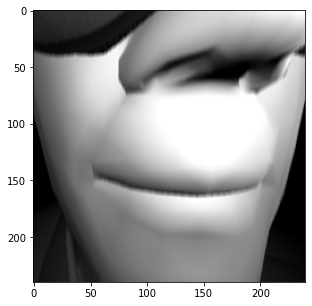

In [189]:
blurandshow(filename0,cut0)

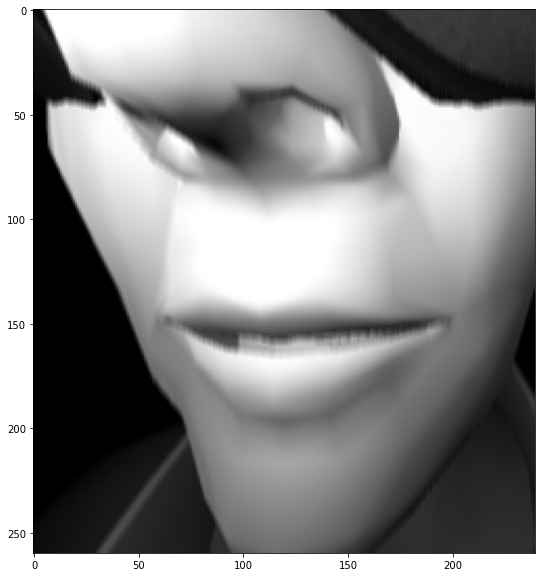

In [187]:
blurandshow(f1,cut1)

In [80]:
def RGBA2GRAY4GenData(outputPath,outPathInner, imgList,strcut = 19):
    strcut = imgList[0].find('_') 
    for filename in imgList:
        imgFile = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)       
        resultW = cv2.imwrite(outputPath+'/'+outPathInner+'/'+filename[strcut:],imgFile)
        if resultW == False:
            print(filename)

In [39]:
strcutlab06 = 51

In [72]:
filename[51:]

'_v0__leapRight3FemaleAdultblendShape1.AU_15_LipCornerDepressor_25.png'

In [ ]:
RGBA2GRAY(negOut,'img',neglist, 47)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(blur.crop(cut))#(left, upper, right, lower) 
#The top left coordinates correspond to (x, y) = (left, upper)
plt.show()

In [ ]:
RGBA2GRAY(negOut,'img',neglist, 47)

In [ ]:
RGBA2GRAY(negOut,'img',neglist, 47)

In [77]:
def rawInfoGen(outputPath,outPathInner, imgList, strcut = 19,squarecut = 240):    
    # (x, y, width, height).
    with open(outputPath+'/info.dat', 'w') as file:
        for filename in imgList:
            #shutil.copy(filename,outputPath+'/'+outPathInner)
            coordinates = lowerFaceCut(filename, squarecut, squarecut)
            #print(str(coordinates[0]) + ' '+str(coordinates[1]))
            file.write(outPathInner+'/'+filename[strcut:]+" 1" 
                       +' '+str(coordinates[0]) + ' '+str(coordinates[1]) 
                       + ' '+ str(squarecut)+' '+ str(squarecut) + '\n')
                       
    return True

In [78]:
rawInfoGen(lab06outPos,'img', imgetrain, strcutlab06,squarecut = 240)

True

In [66]:
len(imgetrain)

300

In [79]:
RGBA2GRAY(lab06outPos,'img', imgetrain, strcutlab06)

In [ ]:
root="../../../../Libraries/OpenCV/opencv3.4/neg/img"
neglist = sorted(glob.glob(root+'/*.jpg'),
                      key=lambda x:float(re.findall("(\d+)",x)[0]))

In [ ]:
negOut = '../../negGray'

In [ ]:
img.mode # test pil color mode like grayscale or rgbd

In [102]:
def neglistgen(negoutpath, outPathInner, strcut = 19):
    neglist = sorted(glob.glob(negoutpath+'/' +outPathInner +'/*.png'),
                      key=lambda x:float(re.findall("(\d+)",x)[0]))
    #print(negoutpath+'/' +outPathInner )
    #print(neglist)
    #strcut = neglist[0].find('_')
    with open(negoutpath+'/bg.txt', 'w') as file:
        for filename in neglist:
            file.write(outPathInner+'/'+os.path.basename(filename)+'\n')
                       
    return True

In [104]:
lab06neg = '../Dataware/CascadeNegGray'

In [194]:
f1.find('_')

51

In [196]:
f1[51:]

'_v0__leapRight0FemaleAdultblendShape1.AA_VI_13_O_25.png'

In [105]:
neglistgen(lab06neg,'img')

True

In [99]:
def NegRGB2GrayResize(rawPath, outPath, tgtSize=(640,480)):
    indice = 0
    neglist = sorted(glob.glob(rawPath +'/*.jpg'),
                      key=lambda x:float(re.findall("(\d+)",x)[0]))
    neglist += sorted(glob.glob(rawPath +'/*.png'),
                      key=lambda x:float(re.findall("(\d+)",x)[0]))
    print(len(neglist))
    for filename in neglist:
        imgFile = cv2.imread(filename,cv2.IMREAD_GRAYSCALE)     
        imgFile = cv2.resize(imgFile,tgtSize)
        resultW = cv2.imwrite(outPath+'/'+ str(indice) +'.png',imgFile)
        indice += 1 
    return True

In [86]:
Lab06NegRawPath = '../Dataware/CascadeNegData/img'

In [95]:
Lab06NegGrayPath = '../Dataware/CascadeNegGray/img'

In [100]:
NegRGB2GrayResize(Lab06NegRawPath, Lab06NegGrayPath)

280


True

# testing

In [109]:
imgtest = []
for indexes in test:
    imgtest.append(imglist[indexes])

In [110]:
imgtest

['CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapRight1FemaleAdultblendShape1.HB_05_MouthDeflated_75.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapLeft3FemaleAdultblendShape1.AU_15_LipCornerDepressor_50.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapLeft6MaleAdultblendShape1.SR_08_Mouth_Ape_Shape_75.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapLeft1FemaleAdultblendShape1.AU_25_LipsPart_50.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapLeft1FemaleAdultblendShape1.AA_VI_13_O_100.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapLeft5MaleAdultblendShape1.SR_07_Cheek_Suck_25.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapLeft2FemaleAdultblendShape1.AU_18_LipPuckerer_100.png',
 'CSCI9015/FacialExpressionGenerator/Output/landmark\\_v0__leapLeft3FemaleAdultblendShape1.AU_16_LowerLipDepressor_25.png',
 'CSCI9015/FacialExpressionGenerator/Output/landm

In [111]:
test0 = cv2.imread(imgtest[0],cv2.IMREAD_GRAYSCALE)

In [107]:
MyLowFaceCascda  = cv2.CascadeClassifier('cascade.xml')

In [112]:
 face_rect = MyLowFaceCascda.detectMultiScale(test0, scaleFactor = 1.2, minNeighbors = 5)

In [113]:
face_rect

array([[130, 167, 102, 102],
       [221, 204,  48,  48],
       [234, 401,  43,  43],
       [373, 292,  77,  77]])

In [114]:
result0 = test0.copy()

In [115]:
cv2.rectangle(result0, (face_rect[0][0], face_rect[0][1]), 
              (face_rect[0][0] + face_rect[0][2],face_rect[0][1] +face_rect[0][3]),
              (255, 255, 255), 10) 

array([[62, 61, 60, ...,  0,  0,  0],
       [61, 62, 61, ...,  0,  0,  0],
       [61, 61, 62, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

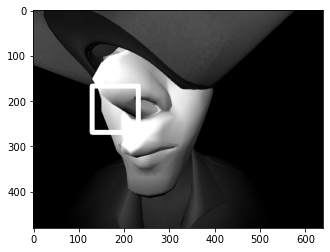

In [117]:
plt.imshow(result0,cmap="gray")

In [172]:
def testOnCascadeShow(img,CasSF= 2, CasNgb = 5):
    if(CasSF<=1):
        print("Cascade scaleFactor must be larger than 1")
        return False
    resizeCopy = img.copy()
    resizeCopy = cv2.resize(resizeCopy,(106,80)) # original resolution divided by 6 because of kernel
    MyLowFaceCascda  = cv2.CascadeClassifier('cascade.xml')
    face_rect= MyLowFaceCascda.detectMultiScale(resizeCopy, scaleFactor = CasSF, minNeighbors = CasNgb)
    if(face_rect.shape[0]) > 0:
        print('found out ',face_rect.shape[0], ' face or faces')
        cv2.rectangle(resizeCopy, (face_rect[0][0], face_rect[0][1]), 
              (face_rect[0][0] + face_rect[0][2],face_rect[0][1] +face_rect[0][3]),
              (155, 155, 155), 4) 
        plt.imshow(resizeCopy,cmap="gray")
    
    return True

In [143]:
test1 = cv2.imread(imgtest[2],cv2.IMREAD_GRAYSCALE)

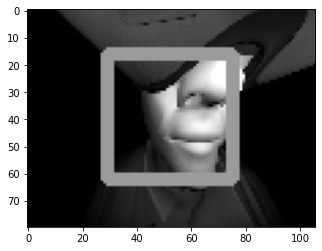

In [144]:
testOnCascadeShow(test1)

found out  1  face or faces


True

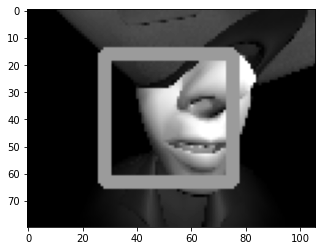

In [183]:
testOnCascadeShow(cv2.imread(imgtest[3],cv2.IMREAD_GRAYSCALE),CasSF= 1.1, CasNgb = 3)

found out  1  face or faces


True

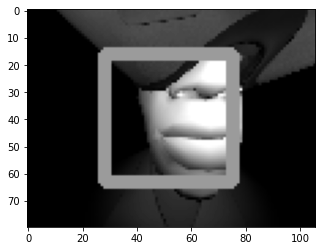

In [180]:
testOnCascadeShow(cv2.imread(imgtest[5],cv2.IMREAD_GRAYSCALE),CasSF= 1.1, CasNgb = 1)

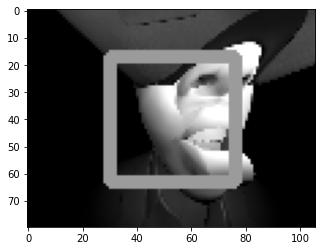

In [148]:
testOnCascadeShow(cv2.imread(imgtest[6],cv2.IMREAD_GRAYSCALE))

found out  1  face or faces


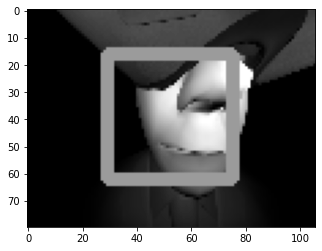

In [156]:
testOnCascadeShow(cv2.imread(imgtest[8],cv2.IMREAD_GRAYSCALE))

found out  1  face or faces


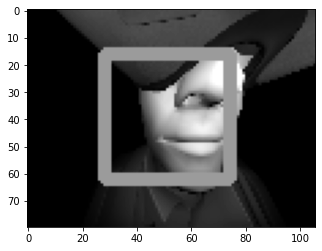

In [157]:
testOnCascadeShow(cv2.imread(imgtest[9],cv2.IMREAD_GRAYSCALE))

found out  2  faces


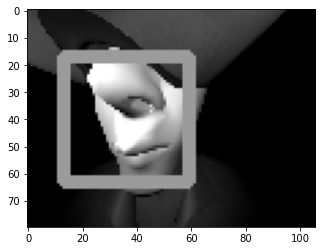

In [154]:
testOnCascadeShow(cv2.imread(imgtest[0],cv2.IMREAD_GRAYSCALE))

In [184]:
NeoTestind = np.random.choice(5000, 30,replace=False)

In [185]:
NeoImgtest = []
for indexes in NeoTestind:
    NeoImgtest.append(imglist[indexes])

found out  2  face or faces


True

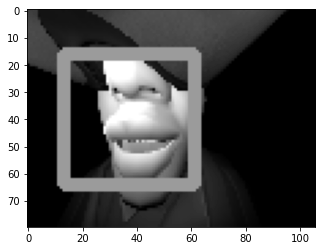

In [186]:
testOnCascadeShow(cv2.imread(NeoImgtest[3],cv2.IMREAD_GRAYSCALE),CasSF= 1.1, CasNgb = 3)

found out  1  face or faces


True

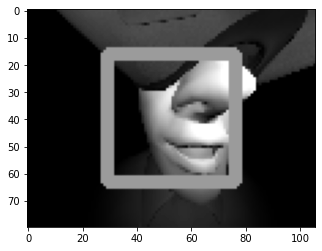

In [187]:
testOnCascadeShow(cv2.imread(NeoImgtest[7],cv2.IMREAD_GRAYSCALE),CasSF= 1.1, CasNgb = 3)